In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [8]:
# Load the dataset
file_path = "Online Retail.xlsx"
df = pd.read_excel(file_path)

In [9]:
# Display basic information
print("Dataset Info:")
print(df.info())
print("\nFirst Few Rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None

First Few Rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANG

In [15]:
# Handling missing values
df.dropna(inplace=True)

In [17]:
# Feature selection and preprocessing
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
data = df.groupby('CustomerID').agg({'TotalPrice': 'sum', 'Quantity': 'sum'}).reset_index()
data = data.drop(columns=['CustomerID'])

In [19]:
# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

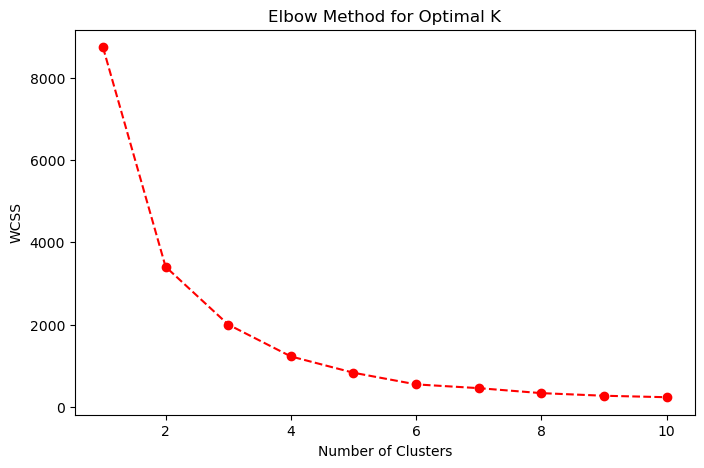

In [21]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker='o', linestyle='dashed', color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [23]:
# Apply K-Means with optimal K
optimal_k = 4  # Based on the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(data_scaled)

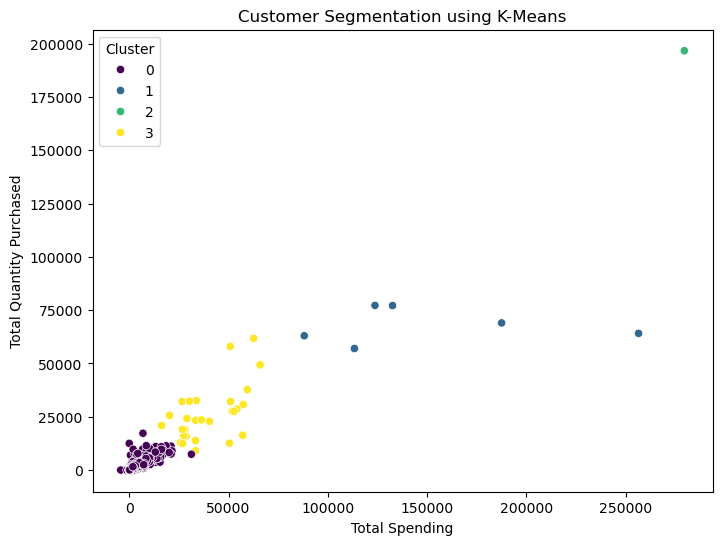

In [25]:
# Visualizing the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['TotalPrice'], y=data['Quantity'], hue=data['Cluster'], palette='viridis')
plt.xlabel('Total Spending')
plt.ylabel('Total Quantity Purchased')
plt.title('Customer Segmentation using K-Means')
plt.legend(title='Cluster')
plt.show()